In [1]:
import os
import sys
sys.path.append('../pyorderedfuzzy')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ofnumber as ofn
from ofcandle import OFCandle, amplitude_order
from scipy import signal
import pickle

In [ ]:
shifts = np.exp(0.0893239*np.arange(99)+0.6).astype(np.int)

In [3]:
n = 225
cshifts = np.arange(0,n, dtype=np.int)*1000-np.arange(0,n,dtype=np.int)*335+40
shifts2 = np.ones(len(cshifts), dtype=np.int)*1000

### Test data - to fuzzy

In [4]:
ncan = len(cshifts)
ctype = 'empirical'
params = {'wtype': 'clear', 'param_s': 'average', 'param_c': 'none', 'dim': 101, 'order': amplitude_order}
segs = []
trains = []
for i, f in enumerate(os.listdir(r'../data/test')):
    segs.append(f.split('.')[0])
    df_train = pd.read_csv(r'../data/test/{}'.format(f), dtype = {'acoustic_data': np.float64})
    data = df_train['acoustic_data'].values
    cans = [_ for _ in range(ncan)]
    for ic in range(ncan):
        x = data[cshifts[ic]:cshifts[ic]+shifts2[ic]]
        xdata = {'price': x, 'volume': np.zeros_like(x), 'spread': np.zeros_like(x)}
        can = OFCandle(ctype, xdata, params)
        cans[ic] = np.hstack([can.branch_f.fvalue_y,can.branch_g.fvalue_y[::-1]])
    trains.append(cans)
    print(i, end=' ')
trains = np.array(trains)
segs = np.array(segs)

pickle.dump([trains, segs], open('/media/adamm/4834-7755/earthquake/test_out.pkl', 'wb'))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 

In [5]:
trains.shape, segs.shape

((2624, 225, 202), (2624,))

### Example

seg_e6e24e


<IPython.core.display.Javascript object>


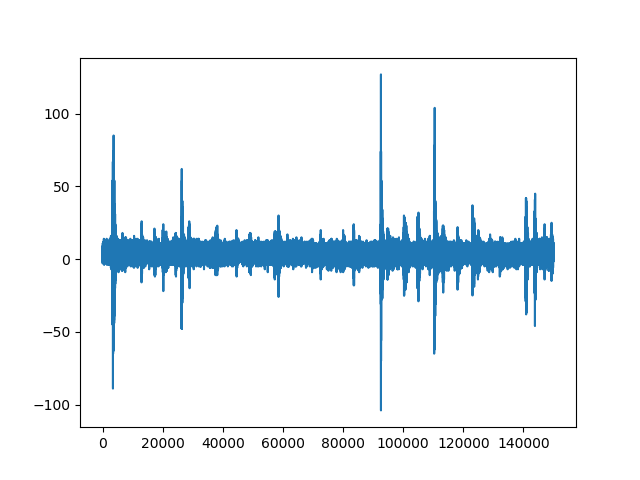

In [9]:
%matplotlib notebook
nr = 10
seg_id = segs[nr] #'seg_0a0fbb'
print(seg_id)
df_train = pd.read_csv(r'../data/test/{}.csv'.format(seg_id), dtype = {'acoustic_data': np.float64})
data = df_train['acoustic_data'].values
fig = plt.figure()
plt.plot(data)
plt.show()

<IPython.core.display.Javascript object>


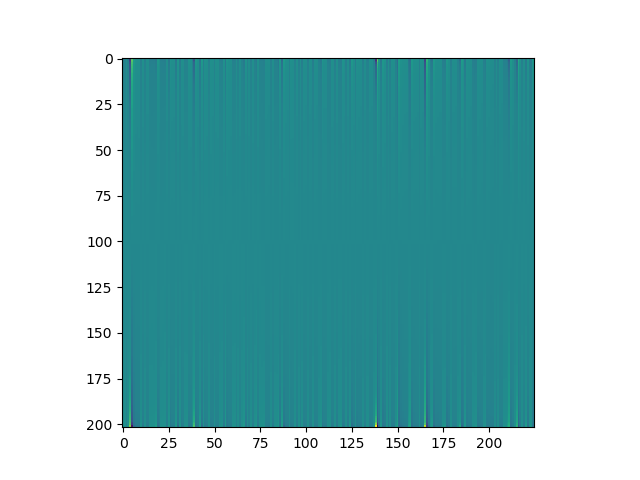

In [11]:
k = 1
indices = [t for t in range(0,101,k)] + [t for t in range(101,202,k)]
fig = plt.figure()
plt.imshow((trains[nr,:,indices]))
plt.show()

### Train data

In [4]:
i = 8
step = 15000
frame = 150000
nrows = 75000000
skiprows = i*nrows - int(i>0)*(frame - step)
if i==0:
    df_train = pd.read_csv('../data/train.csv', dtype = {'acoustic_data': np.float64, 'time_to_failure': np.float64}, nrows=nrows, skiprows=skiprows)
else:
    df_train = pd.read_csv('../data/train.csv', header=None, names=['acoustic_data','time_to_failure'], dtype = {'acoustic_data': np.float64, 'time_to_failure': np.float64}, nrows=nrows, skiprows=skiprows)
len(df_train)

29280481

In [5]:
nrows = 29280481
n = 225
cshifts = np.arange(0,n, dtype=np.int)*1000-np.arange(0,n,dtype=np.int)*335+40
shifts2 = np.ones(len(cshifts), dtype=np.int)*1000

In [6]:
s = 0
trains = []
targets = []
ctype = 'empirical'
params = {'wtype': 'clear', 'param_s': 'average', 'param_c': 'none', 'dim': 101, 'order': amplitude_order}

while True:
    data = df_train.values[s*step:s*step+frame]
    data_x = data[:,0]
    data_y = data[:,1]
    cans = [_ for _ in range(n)]
    tar = [_ for _ in range(n)]
    for ic in range(n):
        x = data_x[cshifts[ic]:cshifts[ic]+shifts2[ic]]
        y = data_y[cshifts[ic]:cshifts[ic]+shifts2[ic]]
        xdata = {'price': x, 'volume': np.zeros_like(x), 'spread': np.zeros_like(x)}
        can = OFCandle(ctype, xdata, params)
        cans[ic] = np.hstack([can.branch_f.fvalue_y,can.branch_g.fvalue_y[::-1]])
        tar[ic] = y[-1]
    trains.append(cans)
    targets.append(tar)
    print(s, end=' ')
    s+=1
    if s*step+frame > nrows:
        break
trains = np.array(trains)
targets = np.array(targets)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 

In [7]:
tmp = np.arange(len(trains), dtype=int)
np.random.shuffle(tmp)
for j in range(8):
    ndata = pickle.load(open('/media/adamm/4834-7755/earthquake/train_{}ne.pkl'.format(j+1), 'rb'))
    x = ndata[0]
    y = ndata[1]
    pickle.dump([np.concatenate([x,trains[tmp[j::8]]]), np.concatenate([y,targets[tmp[j::8]]])], open('/media/adamm/4834-7755/earthquake/train_{}ne.pkl'.format(j+1), 'wb'))

In [8]:
tmp = np.arange(len(trains), dtype=int)
np.random.shuffle(tmp)
for j in range(8):
    pickle.dump([trains[tmp[j::8]], targets[tmp[j::8]]], open('/media/adamm/4834-7755/earthquake/train_{}ne.pkl'.format(j+1), 'wb'))


In [7]:
for j in range(8):
    ndata = pickle.load(open('/media/adamm/4834-7755/earthquake/train_{}ne.pkl'.format(j+1), 'rb'))
    x = ndata[0]
    y = ndata[1]
    print(x.shape, y.shape)

(1248, 225, 202) (1248, 225)
(1248, 225, 202) (1248, 225)
(1248, 225, 202) (1248, 225)
(1248, 225, 202) (1248, 225)
(1248, 225, 202) (1248, 225)
(1248, 225, 202) (1248, 225)
(1248, 225, 202) (1248, 225)
(1246, 225, 202) (1246, 225)


In [10]:
tmp = np.arange(len(trains), dtype=int)
print(tmp[1:10])
np.random.shuffle(tmp)
print(tmp[1:10])

[1 2 3 4 5 6 7 8 9]
[2008 2447 2460 3445 1378 3248 4268 1571 1826]


In [18]:
z = np.concatenate([x,x])

In [19]:
z.shape

(1246, 225, 202)